# **Finding Optimal Weight**

In [ ]:
pip install PyPortfolioOpt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.1/220.1 kB 8.1 MB/s eta 0:00:00


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pypfopt as pyp
import seaborn as sns
import yfinance as yf

In [ ]:
pip install backtrader

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 419.5/419.5 kB 5.7 MB/s eta 0:00:00


In [ ]:
pip install pyfolio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.1/91.1 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.8 MB/s eta 0:00:00
  Created wheel for pyfolio: filename=pyfolio-0.9.2-py3-none-any.whl size=88654 sha256=00fcb9f11903f4027b8622eaeff09d51a23d35aacfbde8bb6ad4512f38b80c56
  Stored in directory: /root/.cache/pip/wheels/f9/af/9e/7c343b822164a3147a3d395a1bcd05041c520a3bc6398fe88e
  Created wheel for empyrical: filename=empyrical-0.5.5-py3-none-any.whl size=39752 sha256=583c5c3d4f5cf6801d0e54fac19a917ac367b6c58b2206825666daaf0bd14eee
  Stored in directory: /root/.cache/pip/wheels/ac/1d/58/a7ae5ef5c8de7c4b769f24c2584f4706564921f031b16b9cb6
Successfully built pyfolio empyrical


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import pypfopt as pyp
from pypfopt import black_litterman, risk_models, expected_returns

# Define NIFTY 50 tickers (removing duplicates)
nifty_200_tickers = list(set([
    'ADANIGREEN.NS', 'ADANIPORTS.NS', 'AMBUJACEM.NS', 'ASIANPAINT.NS', 'AXISBANK.NS',
    'BAJAJ-AUTO.NS', 'BAJFINANCE.NS', 'BAJAJFINSV.NS', 'BHARTIARTL.NS', 'BOSCHLTD.NS',
    'BRITANNIA.NS', 'CIPLA.NS', 'DIVISLAB.NS', 'DRREDDY.NS', 'EICHERMOT.NS',
    'GRASIM.NS', 'HDFC.NS', 'HDFCBANK.NS', 'HDFCLI.NS', 'HEROMOTOCO.NS',
    'HINDALCO.NS', 'HINDUNILVR.NS', 'ICICIBANK.NS', 'ITC.NS', 'INDUSINDBK.NS',
    'INFY.NS', 'IOC.NS', 'JSWSTEEL.NS', 'KOTAKBANK.NS', 'LT.NS',
    'M&M.NS', 'MARUTI.NS', 'NESTLEIND.NS', 'NTPC.NS', 'ONGC.NS',
    'POWERGRID.NS', 'RELIANCE.NS', 'SBIN.NS', 'SHREECEM.NS', 'SUNPHARMA.NS',
    'TATACONSUM.NS', 'TATAMOTORS.NS', 'TCS.NS', 'TECHM.NS', 'ULTRACEMCO.NS',
    'UPL.NS', 'WIPRO.NS', 'ZEEL.NS', 'ACC.NS', 'ADANIGREEN.NS',
    'ADANIPORTS.NS', 'HINDALCO.NS', 'ICICIPRULI.NS', 'BAJFINANCE.NS', 'TATASTEEL.NS',
    'CIPLA.NS', 'HEROMOTOCO.NS', 'INFY.NS', 'TATAMOTORS.NS', 'KOTAKBANK.NS',
    'HDFCAMC.NS', 'BHARTIARTL.NS', 'MOTHERSON.NS', 'AMBUJACEM.NS', 'DRREDDY.NS',
    'ADANIGREEN.NS', 'BRITANNIA.NS', 'PERSISTENT.NS', 'ADANIPORTS.NS', 'HDFC.NS',
    'WIPRO.NS', 'LUPIN.NS', 'ZEELEARN.NS', 'LICHSGFIN.NS', 'BAJAJAUTO.NS',
    'RELIANCE.NS', 'INDUSINDBK.NS', 'TCS.NS', 'BOSCHLTD.NS', 'M&M.NS',
    'ULTRACEMCO.NS', 'HINDUNILVR.NS', 'SHREECEM.NS', 'ITC.NS', 'SUNPHARMA.NS',
    'L&T.NS', 'HDFCAMF.NS', 'TATAELXSI.NS', 'SBI.NS', 'IPCALAB.NS',
    'ICICIBANK.NS', 'JINDALSTEL.NS', 'GAIL.NS', 'NTPC.NS', 'TATACONSUM.NS',
    'HINDUSTANZINC.NS', 'COLPAL.NS', 'SBILIFE.NS', 'M&MFIN.NS', 'HDFC.MS',
    'TORNTPHARM.NS', 'RELIANCE.NS', 'KOTAKBANK.NS', 'PIDILITE.NS', 'MARUTI.NS',
    'ONGC.NS', 'BHEL.NS', 'PVR.NS', 'TCS.NS', 'CIPLA.NS', 'NTPC.NS',
    'UPL.NS', 'BANKBARODA.NS', 'DIVISLAB.NS', 'SBI.NS', 'HINDALCO.NS',
    'MAHINDCIE.NS', 'ADANIGREEN.NS', 'TATAMOTORS.NS', 'INFY.NS', 'WIPRO.NS',
    'BAJFINANCE.NS', 'TECHM.NS', 'ADANIPORTS.NS', 'MARUTI.NS', 'HINDUNILVR.NS',
    'ASIANPAINT.NS', 'AUBANK.NS', 'LUPIN.NS', 'ICICIPRULI.NS', 'HEROMOTOCO.NS',
    'BHEL.NS', 'GRASIM.NS', 'GAIL.NS', 'JUBLFOOD.NS', 'SUNPHARMA.NS',
    'HDFCBANK.NS', 'TATASTEEL.NS', 'TATACONSUM.NS', 'CIPLA.NS', 'MOTHERSHUN.NS',
    'SHREECEM.NS', 'LT.NS', 'TATAMOTORS.NS', 'TATAPOWER.NS', 'PERSISTENT.NS',
    'TECHM.NS', 'MARUTI.NS', 'AXISBANK.NS', 'ZEELEARN.NS', 'NTPC.NS',
    'HDFCAMC.NS', 'TATAMOTORS.NS', 'ICICIBANK.NS', 'SBI.NS', 'RELIANCE.NS',
    'BIRLAMONEY.NS', 'HDFC.LTD', 'LUPIN.NS', 'NTPC.NS', 'GAIL.NS',
    'GRASIM.NS', 'TATAELXSI.NS', 'ICICIPRULI.NS', 'ZEELEARN.NS', 'LICHSGFIN.NS',
    'MAHINDCIE.NS', 'MINDTREE.NS', 'HINDUNILVR.NS', 'WIPRO.NS', 'ITC.NS'
]))


# Set start and end dates
start_date = '2015-01-01'
end_date = '2018-12-31'

valid_tickers = []

# Check for available data and collect valid tickers
for ticker in nifty_200_tickers:
    try:
        data = yf.download(ticker, start=start_date, end=end_date)['Close']
        if not data.empty:
            valid_tickers.append(ticker)
            print(f"Data available for: {ticker}")
        else:
            print(f"No data for: {ticker}")
    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")

print(valid_tickers)


[*********************100%***********************]  1 of 1 completed


Data available for: ASIANPAINT.NS


[*********************100%***********************]  1 of 1 completed


Data available for: JSWSTEEL.NS


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Data available for: DIVISLAB.NS
Data available for: CIPLA.NS
Data available for: HDFCAMC.NS
Data available for: BRITANNIA.NS
Data available for: BAJAJ-AUTO.NS
Data available for: TECHM.NS


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['WIPRO.NS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2015-01-01 -> 2018-12-31)')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


No data for: WIPRO.NS
Data available for: JINDALSTEL.NS
Data available for: BAJFINANCE.NS
Data available for: TATACONSUM.NS
Data available for: IPCALAB.NS
Data available for: M&MFIN.NS


[*********************100%***********************]  1 of 1 completed


Data available for: BHARTIARTL.NS


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MINDTREE.NS']: YFTzMissingError('possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SBI.NS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2015-01-01 -> 2018-12-31)')
[*********************100%***********************]  1 of 1 completed


No data for: MINDTREE.NS
No data for: SBI.NS
Data available for: HINDUNILVR.NS


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PVR.NS']: YFTzMissingError('possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


No data for: PVR.NS
Data available for: IOC.NS


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['HDFC.MS']: YFTzMissingError('possibly delisted; no timezone found')


No data for: HDFC.MS


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Data available for: SUNPHARMA.NS
Data available for: KOTAKBANK.NS


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Data available for: ZEELEARN.NS
Data available for: LT.NS


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Data available for: PERSISTENT.NS
Data available for: NESTLEIND.NS
Data available for: UPL.NS
Data available for: TORNTPHARM.NS
Data available for: ULTRACEMCO.NS
Data available for: M&M.NS


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Data available for: HINDALCO.NS
Data available for: MARUTI.NS
Data available for: ONGC.NS


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['HINDUSTANZINC.NS']: YFTzMissingError('possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


No data for: HINDUSTANZINC.NS
Data available for: ICICIBANK.NS


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MOTHERSHUN.NS']: YFTzMissingError('possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


No data for: MOTHERSHUN.NS
Data available for: LICHSGFIN.NS


[*********************100%***********************]  1 of 1 completed


Data available for: INFY.NS


[*********************100%***********************]  1 of 1 completed


Data available for: BHEL.NS


[*********************100%***********************]  1 of 1 completed


Data available for: TATASTEEL.NS


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['HDFCAMF.NS']: YFTzMissingError('possibly delisted; no timezone found')


No data for: HDFCAMF.NS


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Data available for: TCS.NS
Data available for: HEROMOTOCO.NS


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Data available for: INDUSINDBK.NS
Data available for: SHREECEM.NS


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Data available for: GRASIM.NS
Data available for: TATAELXSI.NS


[*********************100%***********************]  1 of 1 completed


Data available for: AXISBANK.NS


[*********************100%***********************]  1 of 1 completed


Data available for: EICHERMOT.NS


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BAJAJAUTO.NS']: YFTzMissingError('possibly delisted; no timezone found')


No data for: BAJAJAUTO.NS


[*********************100%***********************]  1 of 1 completed


Data available for: MOTHERSON.NS


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MAHINDCIE.NS']: YFTzMissingError('possibly delisted; no timezone found')


No data for: MAHINDCIE.NS


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Data available for: RELIANCE.NS
Data available for: ADANIGREEN.NS


[*********************100%***********************]  1 of 1 completed


Data available for: ADANIPORTS.NS


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PIDILITE.NS']: YFTzMissingError('possibly delisted; no timezone found')


No data for: PIDILITE.NS


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Data available for: DRREDDY.NS


Data available for: ZEEL.NS


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Data available for: JUBLFOOD.NS
Data available for: BOSCHLTD.NS


[*********************100%***********************]  1 of 1 completed


Data available for: POWERGRID.NS


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Data available for: TATAMOTORS.NS
Data available for: SBILIFE.NS


[*********************100%***********************]  1 of 1 completed


Data available for: LUPIN.NS


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Data available for: NTPC.NS
Data available for: AMBUJACEM.NS


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['L&T.NS']: YFTzMissingError('possibly delisted; no timezone found')


No data for: L&T.NS


[*********************100%***********************]  1 of 1 completed


Data available for: GAIL.NS


[*********************100%***********************]  1 of 1 completed


Data available for: SBIN.NS


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ITC.NS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2015-01-01 -> 2018-12-31)')


No data for: ITC.NS


[*********************100%***********************]  1 of 1 completed


Data available for: BANKBARODA.NS


[*********************100%***********************]  1 of 1 completed


Data available for: TATAPOWER.NS


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Data available for: BIRLAMONEY.NS
Data available for: ICICIPRULI.NS


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['HDFC.LTD']: YFTzMissingError('possibly delisted; no timezone found')


No data for: HDFC.LTD


[*********************100%***********************]  1 of 1 completed


Data available for: ACC.NS


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['HDFC.NS']: YFTzMissingError('possibly delisted; no timezone found')


No data for: HDFC.NS


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['HDFCLI.NS']: YFTzMissingError('possibly delisted; no timezone found')


No data for: HDFCLI.NS


[*********************100%***********************]  1 of 1 completed


Data available for: BAJAJFINSV.NS


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Data available for: HDFCBANK.NS
Data available for: COLPAL.NS


[*********************100%***********************]  1 of 1 completed

Data available for: AUBANK.NS
['ASIANPAINT.NS', 'JSWSTEEL.NS', 'DIVISLAB.NS', 'CIPLA.NS', 'HDFCAMC.NS', 'BRITANNIA.NS', 'BAJAJ-AUTO.NS', 'TECHM.NS', 'JINDALSTEL.NS', 'BAJFINANCE.NS', 'TATACONSUM.NS', 'IPCALAB.NS', 'M&MFIN.NS', 'BHARTIARTL.NS', 'HINDUNILVR.NS', 'IOC.NS', 'SUNPHARMA.NS', 'KOTAKBANK.NS', 'ZEELEARN.NS', 'LT.NS', 'PERSISTENT.NS', 'NESTLEIND.NS', 'UPL.NS', 'TORNTPHARM.NS', 'ULTRACEMCO.NS', 'M&M.NS', 'HINDALCO.NS', 'MARUTI.NS', 'ONGC.NS', 'ICICIBANK.NS', 'LICHSGFIN.NS', 'INFY.NS', 'BHEL.NS', 'TATASTEEL.NS', 'TCS.NS', 'HEROMOTOCO.NS', 'INDUSINDBK.NS', 'SHREECEM.NS', 'GRASIM.NS', 'TATAELXSI.NS', 'AXISBANK.NS', 'EICHERMOT.NS', 'MOTHERSON.NS', 'RELIANCE.NS', 'ADANIGREEN.NS', 'ADANIPORTS.NS', 'DRREDDY.NS', 'ZEEL.NS', 'JUBLFOOD.NS', 'BOSCHLTD.NS', 'POWERGRID.NS', 'TATAMOTORS.NS', 'SBILIFE.NS', 'LUPIN.NS', 'NTPC.NS', 'AMBUJACEM.NS', 'GAIL.NS', 'SBIN.NS', 'BANKBARODA.NS', 'TATAPOWER.NS', 'BIRLAMONEY.NS', 'ICICIPRULI.NS', 'ACC.NS', 'BAJAJFINSV.NS', 'HDFCBANK.NS', 'COLPAL.NS', 'AUBANK.

In [ ]:
print(len(valid_tickers))

67


In [ ]:
# Download close prices for valid tickers
# Set start and end dates
start_date = '2015-01-01'
end_date = '2018-12-31'
valid_tickers = [ticker for ticker in valid_tickers if ticker != 'ITC.NS']
if valid_tickers:
    prices = yf.download(valid_tickers, start=start_date, end=end_date)

    # Extract Close prices
    close_prices = prices['Close']
   # Calculate daily returns
    returns = close_prices.pct_change().dropna()

[*********************100%***********************]  67 of 67 completed


In [ ]:
print(len(valid_tickers))

67


In [ ]:
prices

Price             Close                                           \
Ticker           ACC.NS ADANIGREEN.NS ADANIPORTS.NS AMBUJACEM.NS   
Date                                                               
2015-01-01  1224.379150           NaN    303.241058   194.838470   
2015-01-02  1243.875854           NaN    303.051300   197.576050   
2015-01-05  1250.636475           NaN    307.274170   197.319397   
2015-01-06  1206.932007           NaN    305.423645   190.047714   
2015-01-07  1192.887451           NaN    304.711975   188.293961   
...                 ...           ...           ...          ...   
2018-12-21  1383.882690     42.500000    348.198090   196.579697   
2018-12-24  1344.503662     42.150002    348.198090   189.943909   
2018-12-26  1373.991333     41.549999    363.095978   196.936005   
2018-12-27  1355.230835     41.450001    370.279846   193.150467   
2018-12-28  1374.270142     41.700001    373.558319   196.802368   

Price                                                                         \
Ticker     ASIANPAINT.NS   AUBANK.NS AXISBANK.NS BAJAJ-AUTO.NS BAJAJFINSV.NS   
Date                                                                           
2015-01-01    693.542236         NaN  486.874786   1892.128052    127.966003   
2015-01-02    717.519836         NaN  497.763031   1891.819092    126.876907   
2015-01-05    717.473328         NaN  500.908508   1898.725098    125.191048   
2015-01-06    700.346741         NaN  483.003387   1883.910278    122.296730   
2015-01-07    714.418457         NaN  482.616272   1888.308716    122.192307   
...                  ...         ...         ...           ...           ...   
2018-12-21   1324.889160  316.875824  617.389893   2357.190674    634.328247   
2018-12-24   1295.160156  301.749756  611.572449   2286.855713    625.785950   
2018-12-26   1300.838501  294.584778  616.047424   2295.207275    642.202393   
2018-12-27   1309.905273  296.276550  614.108276   2297.221436    638.811462   
2018-12-28   1303.701782  289.634003  621.566467   2280.854492    648.570496   

Price                     ...        Volume                            \
Ticker     BAJFINANCE.NS  ... TATAMOTORS.NS TATAPOWER.NS TATASTEEL.NS   
Date                      ...                                           
2015-01-01    339.664368  ...        944551       938370     26570816   
2015-01-02    334.234131  ...       4193093      2387959     36043328   
2015-01-05    333.360657  ...       6758676      1932062     54638866   
2015-01-06    332.496857  ...       7979598      3509161     64767961   
2015-01-07    339.266418  ...       9232656      6050723     49846923   
...                  ...  ...           ...          ...          ...   
2018-12-21   2543.640869  ...      23742481      7243377     59696700   
2018-12-24   2517.774902  ...      11374468      5132728     43294400   
2018-12-26   2520.229004  ...      12044191      4017872     49537410   
2018-12-27   2539.615967  ...      15231581     12997320     50169310   
2018-12-28   2586.390869  ...       8669584      3477676     63074080   

Price                                                                       \
Ticker       TCS.NS TECHM.NS TORNTPHARM.NS ULTRACEMCO.NS   UPL.NS  ZEEL.NS   
Date                                                                         
2015-01-01   366830   489388         76888         54097   787731   321140   
2015-01-02   925740  1025204        154932        228660  3485478   960337   
2015-01-05  1754242   770804         83424        181680  1455238   842678   
2015-01-06  2423784  1959932         86444        292468  2071117  1443145   
2015-01-07  2636332  1331532        116872        120023  3720183  1527500   
...             ...      ...           ...           ...      ...      ...   
2018-12-21  3729956  2063928        608564        390384  5238295  5119793   
2018-12-24  1864116  1472565        133502        322548  2679819  4194897   
2018-12-26  2446614  1881689        263026   

In [ ]:

# Feature Engineering: Add simple technical indicators
def add_technical_indicators(close):
    df = close.to_frame()
    df.columns = ['close']
    # Simple Moving Average (SMA)
    df['SMA_10'] = df['close'].rolling(window=10, min_periods=1).mean()
    # Relative Strength Index (RSI)
    delta = df['close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
    rs = gain / loss
    df['RSI_14'] = 100 - (100 / (1 + rs))
    # Moving Average Convergence Divergence (MACD)
    short_ema = df['close'].ewm(span=12, adjust=False).mean()
    long_ema = df['close'].ewm(span=26, adjust=False).mean()
    df['MACD'] = short_ema - long_ema
    return df.drop(columns=['close'])

# Apply indicators to each stock
indicator_dfs = [add_technical_indicators(close_prices[stock]) for stock in returns.columns]
returns_with_indicators = pd.concat(indicator_dfs, axis=1)

# Combine returns and indicators into a single DataFrame
features = pd.concat([returns, returns_with_indicators], axis=1).dropna()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 502ms/step - loss: 8.6081e-04 - mae: 0.0217 - val_loss: 4.5604e-04 - val_mae: 0.0155
Epoch 2/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 365ms/step - loss: 5.5914e-04 - mae: 0.0174 - val_loss: 4.6580e-04 - val_mae: 0.0157
Epoch 3/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 503ms/step - loss: 5.5186e-04 - mae: 0.0172 - val_loss: 4.7061e-04 - val_mae: 0.0158
Epoch 4/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 354ms/step - loss: 5.4191e-04 - mae: 0.0172 - val_loss: 4.7041e-04 - val_mae: 0.0158
Epoch 5/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 361ms/step - loss: 5.0560e-04 - mae: 0.0166 - val_loss: 4.6697e-04 - val_mae: 0.0157
Epoch 6/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 352ms/step - loss: 5.3480e-04 - mae: 0.0168 - val_loss: 4.6365e-04 - val_mae: 0.0156
Epoch 7/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 341ms/step - loss: 5.2456e-04 - mae: 0.0167 - val_loss: 4.5997e-04 - val_mae: 0.0155
Epoch 8/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 359ms/step - loss: 5.3757e-04 - mae: 0.0170 - val_loss: 4.5799e-04 - val_mae: 0.0154
Epoch 9/

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 259ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
Epoch 1/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 37s 493ms/step - loss: 0.2327 - val_loss: 0.2302
Epoch 2/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 332ms/step - loss: 0.2231 - val_loss: 0.2193
Epoch 3/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 455ms/step - loss: 0.2018 - val_loss: 0.1708
Epoch 4/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 349ms/step - loss: 0.1698 - val_loss: 0.1547
Epoch 5/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 342ms/step - loss: 0.1536 - val_loss: 0.1330
Epoch 6/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 332ms/step - loss: 0.1345 - val_loss: 0.1119
Epoch 7/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 371ms/step - loss: 0.1160 - val_loss: 0.0916
Epoch 8/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 328ms/step - loss: 0.0922 - val_loss: 0.0704
Epoch 9/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 344ms/step - loss: 0.0750 - val_loss: 0.0541
Epoch 10/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 343ms/step - loss: 0.0589 - val_loss: 0.0401
Epoch 11/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 325ms/step - loss: 0.0431 - val_loss: 0.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


/usr/local/lib/python3.11/dist-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  warnings.warn(


Generated Views:
ASIANPAINT.NS: Predicted return = -0.0009
JSWSTEEL.NS: Predicted return = -0.0055
DIVISLAB.NS: Predicted return = -0.0002
CIPLA.NS: Predicted return = -0.0004
HDFCAMC.NS: Predicted return = -0.0004
BRITANNIA.NS: Predicted return = -0.0019
BAJAJ-AUTO.NS: Predicted return = 0.0010
TECHM.NS: Predicted return = 0.0002
JINDALSTEL.NS: Predicted return = -0.0016
BAJFINANCE.NS: Predicted return = -0.0006
TATACONSUM.NS: Predicted return = -0.0043
IPCALAB.NS: Predicted return = -0.0014
M&MFIN.NS: Predicted return = 0.0004
BHARTIARTL.NS: Predicted return = -0.0064
HINDUNILVR.NS: Predicted return = -0.0001
IOC.NS: Predicted return = 0.0001
SUNPHARMA.NS: Predicted return = -0.0020
KOTAKBANK.NS: Predicted return = 0.0016
ZEELEARN.NS: Predicted return = 0.0043
LT.NS: Predicted return = 0.0022
PERSISTENT.NS: Predicted return = -0.0016
NESTLEIND.NS: Predicted return = -0.0001
UPL.NS: Predicted return = -0.0019
TORNTPHARM.NS: Predicted return = -0.0027
ULTRACEMCO.NS: Predicted return = 

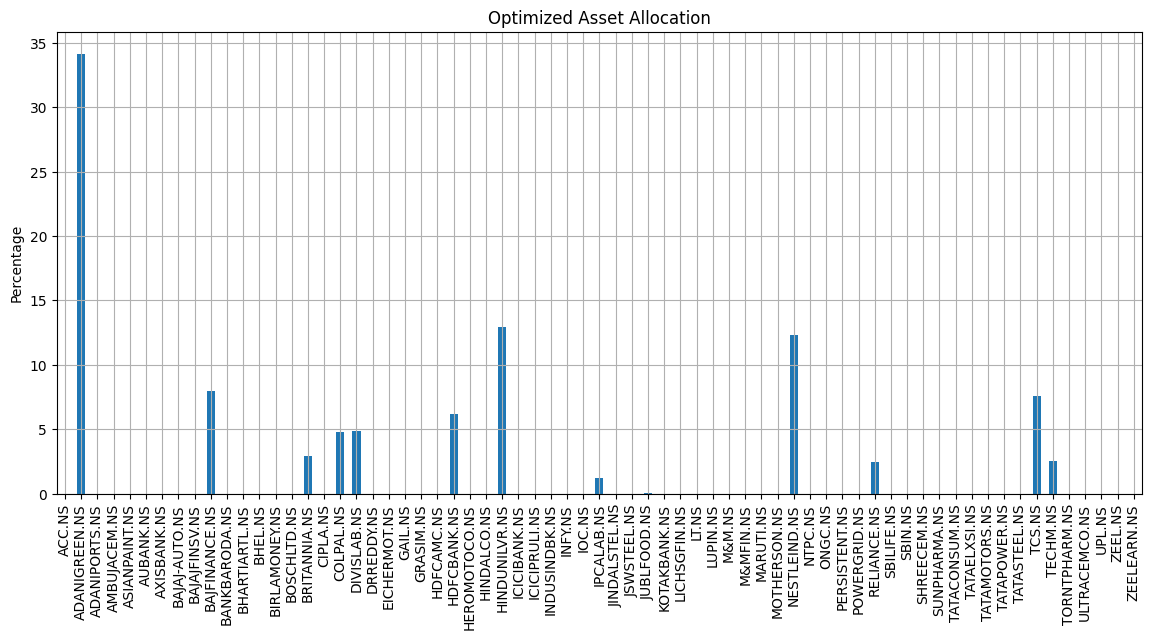

In [ ]:

# Target: Shifted returns for next-day prediction
target = returns.shift(-1).dropna()

# Ensure features and target share the same index
common_index = features.index.intersection(target.index)
features = features.loc[common_index]
target = target.loc[common_index]

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(features)

# Convert target to numpy array
y = target.values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Reshape for LSTM input
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Model 1: Returns Prediction Model
model_returns = Sequential([
    LSTM(128, input_shape=(X_train.shape[1], 1), return_sequences=True),
    Dropout(0.2),
    LSTM(64, return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(y_train.shape[1], activation='linear')  # Predict returns for all assets
])

model_returns.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Train Returns Model
history_returns = model_returns.fit(X_train, y_train,
                                  epochs=80,
                                  batch_size=22,
                                  validation_data=(X_test, y_test),
                                  verbose=1,
                                  callbacks=[EarlyStopping(patience=10)])

# Model 2: Confidence Prediction Model
with np.errstate(invalid='ignore'):
    train_preds = model_returns.predict(X_train)
    confidence_targets_train = 1 / (1 + np.abs(y_train - train_preds))

    test_preds = model_returns.predict(X_test)
    confidence_targets_test = 1 / (1 + np.abs(y_test - test_preds))

# Normalize confidence targets between 0 and 1
confidence_targets_train = confidence_targets_train / np.max(confidence_targets_train)
confidence_targets_test = confidence_targets_test / np.max(confidence_targets_test)

model_confidence = Sequential([
    LSTM(128, input_shape=(X_train.shape[1], 1), return_sequences=True),
    Dropout(0.2),
    LSTM(64, return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(y_train.shape[1], activation='sigmoid')  # Predict confidence between 0 and 1
])

model_confidence.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train Confidence Model
history_confidence = model_confidence.fit(X_train, confidence_targets_train,
                                        epochs=80,
                                        batch_size=22,
                                        validation_data=(X_test, confidence_targets_test),
                                        verbose=1,
                                        callbacks=[EarlyStopping(patience=5)])


# Generate Views and Confidences for Black-Litterman

def generate_views_and_confidences(model_returns, model_confidence, X, tickers,
                                 view_strategy="all", confidence_threshold=0.5):
    # Predict returns and confidences
    predicted_returns = model_returns.predict(X)[0]
    predicted_confidences = model_confidence.predict(X)[0]

    views_dict = {}
    confidences_list = []

    if view_strategy == "all":
        # Strategy 1: Views for all assets
        for idx, ticker in enumerate(tickers):
            views_dict[ticker] = predicted_returns[idx]
            confidences_list.append(predicted_confidences[idx])

    # elif view_strategy == "extreme":
    #     # Strategy 2: Original approach (top/bottom 5)
    #     sorted_indices = np.argsort(predicted_returns)
    #     extreme_indices = list(sorted_indices[:5]) + list(sorted_indices[-5:])
    #     for idx in extreme_indices:
    #         ticker = tickers[idx]
    #         views_dict[ticker] = predicted_returns[idx]
    #         confidences_list.append(predicted_confidences[idx])

    # elif view_strategy == "threshold":
    #     # Strategy 3: Only high-confidence views
    #     for idx, ticker in enumerate(tickers):
    #         if predicted_confidences[idx] > confidence_threshold:
    #             views_dict[ticker] = predicted_returns[idx]
    #             confidences_list.append(predicted_confidences[idx])

    # elif view_strategy == "mixed":
    #     # Strategy 4: Extreme views + any high-confidence views
    #     sorted_indices = np.argsort(predicted_returns)
    #     extreme_indices = list(sorted_indices[:5]) + list(sorted_indices[-5:])

    #     # Add extreme views
    #     for idx in extreme_indices:
    #         ticker = tickers[idx]
    #         views_dict[ticker] = predicted_returns[idx]
    #         confidences_list.append(predicted_confidences[idx])

    #     # Add any other high-confidence views not already included
    #     for idx, ticker in enumerate(tickers):
    #         if (predicted_confidences[idx] > confidence_threshold and
    #             idx not in extreme_indices):
    #             views_dict[ticker] = predicted_returns[idx]
    #             confidences_list.append(predicted_confidences[idx])

    else:
        raise ValueError("Invalid view_strategy. Choose from: 'all', 'extreme', 'threshold', 'mixed'")

    return views_dict, np.array(confidences_list)

# Generate views and confidences for the test set
views_dict, confidences = generate_views_and_confidences(model_returns, model_confidence, X_test[-1:], valid_tickers)

print("Generated Views:")
for ticker, view in views_dict.items():
    print(f"{ticker}: Predicted return = {view:.4f}")

print("\nConfidences:", confidences)

# Black-Litterman Model Implementation

# Calculate market prior (market-implied returns)
S = risk_models.CovarianceShrinkage(close_prices).ledoit_wolf()
market_prior = expected_returns.ema_historical_return(close_prices)

# Convert views to proper format for PyPortfolioOpt
viewdict = views_dict
Q = np.array(list(viewdict.values()))  # View returns
P = np.zeros((len(Q), len(valid_tickers)))  # Pick matrix

# Create pick matrix
for i, ticker in enumerate(viewdict.keys()):
    j = valid_tickers.index(ticker)
    P[i, j] = 1

# Calculate Omega (uncertainty matrix) based on confidences
tau = 0.05  # Scaling factor
omega = np.diag(1 / (confidences + 1e-6))  # Higher confidence -> lower uncertainty
omega = omega * tau

# Create Black-Litterman model
bl = black_litterman.BlackLittermanModel(S, pi=market_prior, Q=Q, P=P, omega=omega)

# Get posterior estimates
posterior_rets = bl.bl_returns()
posterior_cov = bl.bl_cov()

# Portfolio Optimization

ef = pyp.EfficientFrontier(posterior_rets, posterior_cov, weight_bounds=(0, 0.5))
ef.add_objective(pyp.objective_functions.L2_reg, gamma=0.02)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()

# Portfolio Performance
print("\nPortfolio Performance:")
ef.portfolio_performance(verbose=True)

# Save weights
weights_df = pd.DataFrame([cleaned_weights], columns=cleaned_weights.keys()).T * 100
print("\nOptimized Portfolio Weights:\n", weights_df.round(4))

# Plot the portfolio weights
weights_df.plot.bar(figsize=(14, 6), title='Optimized Asset Allocation', grid=True, legend=False)
plt.ylabel('Percentage')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_absolute_error
import numpy as np

# Set style for all plots (updated to use available styles)
plt.style.use('ggplot')  # Using ggplot style which is widely available
sns.set_style("whitegrid")  # Set seaborn style
sns.set_palette("husl")

# 1. Feature Distribution Plot
def plot_feature_distributions(features, tickers):
    plt.figure(figsize=(14, 8))
    for i, col in enumerate(['Returns', 'SMA_10', 'RSI_14', 'MACD']):
        plt.subplot(2, 2, i+1)
        sns.histplot(features[:,i], bins=50, kde=True)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
    plt.tight_layout()
    plt.savefig('feature_distribution.png', dpi=300, bbox_inches='tight')
    plt.close()



# 3. Confidence Distribution
def plot_confidence_distribution(confidences):
    plt.figure(figsize=(10, 6))
    sns.histplot(confidences, bins=20, kde=True)
    plt.title('Distribution of Confidence Scores')
    plt.xlabel('Confidence Score')
    plt.savefig('confidence_distribution.png', dpi=300, bbox_inches='tight')
    plt.close()



# 5. Error Analysis
def plot_error_analysis(model_returns, X_test, y_test, tickers):
    preds = model_returns.predict(X_test)[0]
    errors = np.abs(y_test[-1] - preds)

    plt.figure(figsize=(12, 6))
    plt.bar(
        x=[tickers[i] for i in np.argsort(errors)[-20:]],  # Top 20 worst predictions
        height=errors[np.argsort(errors)[-20:]]
    )
    plt.title('Prediction Errors by Asset (Top 20)')
    plt.xlabel('Asset')
    plt.ylabel('Absolute Error')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig('error_analysis.png', dpi=300, bbox_inches='tight')
    plt.close()

# Generate all plots
try:
    plot_feature_distributions(X_train[:1000], valid_tickers)

    plot_confidence_distribution(confidences)

    plot_error_analysis(model_returns, X_test, y_test, valid_tickers)
    print("All plots generated successfully!")
except Exception as e:
    print(f"Error generating plots: {str(e)}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
All plots generated successfully!


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Arrow
from matplotlib.text import Text

def draw_model_architecture():
    plt.figure(figsize=(12, 8))
    ax = plt.gca()
    ax.axis('off')

    # Colors
    lstm_color = '#FFD166'
    dense_color = '#06D6A0'
    dropout_color = '#EF476F'
    input_color = '#118AB2'
    output_color = '#073B4C'

    # Draw components
    components = [
        # Input Layer
        {'type': 'rectangle', 'xy': (0.1, 0.4), 'width': 0.1, 'height': 0.2,
         'color': input_color, 'label': 'Input Features\n(Returns + Indicators)'},

        # Returns Model
        {'type': 'rectangle', 'xy': (0.3, 0.6), 'width': 0.1, 'height': 0.1,
         'color': lstm_color, 'label': 'LSTM (128)'},
        {'type': 'rectangle', 'xy': (0.3, 0.45), 'width': 0.1, 'height': 0.1,
         'color': dropout_color, 'label': 'Dropout\n(0.2)'},
        {'type': 'rectangle', 'xy': (0.3, 0.3), 'width': 0.1, 'height': 0.1,
         'color': lstm_color, 'label': 'LSTM (64)'},
        {'type': 'rectangle', 'xy': (0.3, 0.15), 'width': 0.1, 'height': 0.1,
         'color': dropout_color, 'label': 'Dropout\n(0.2)'},
        {'type': 'rectangle', 'xy': (0.5, 0.375), 'width': 0.1, 'height': 0.1,
         'color': dense_color, 'label': 'Dense (32)'},
        {'type': 'rectangle', 'xy': (0.7, 0.375), 'width': 0.1, 'height': 0.1,
         'color': output_color, 'label': 'Returns\nOutput'},

        # Confidence Model
        {'type': 'rectangle', 'xy': (0.3, 0.8), 'width': 0.1, 'height': 0.1,
         'color': lstm_color, 'label': 'LSTM (128)'},
        {'type': 'rectangle', 'xy': (0.3, 0.95), 'width': 0.1, 'height': 0.1,
         'color': dropout_color, 'label': 'Dropout\n(0.2)'},
        {'type': 'rectangle', 'xy': (0.5, 0.875), 'width': 0.1, 'height': 0.1,
         'color': dense_color, 'label': 'Dense (32)'},
        {'type': 'rectangle', 'xy': (0.7, 0.875), 'width': 0.1, 'height': 0.1,
         'color': output_color, 'label': 'Confidence\nOutput'},
    ]

    # Draw all components
    for comp in components:
        rect = Rectangle(comp['xy'], comp['width'], comp['height'],
                        facecolor=comp['color'], edgecolor='black')
        ax.add_patch(rect)

        # Add label
        plt.text(comp['xy'][0] + comp['width']/2, comp['xy'][1] + comp['height']/2,
                comp['label'], ha='center', va='center', fontsize=9)

    # Draw arrows
    arrows = [
        {'start': (0.2, 0.5), 'end': (0.3, 0.65), 'label': ''},
        {'start': (0.4, 0.65), 'end': (0.3, 0.5), 'label': ''},
        {'start': (0.4, 0.5), 'end': (0.3, 0.35), 'label': ''},
        {'start': (0.4, 0.35), 'end': (0.3, 0.2), 'label': ''},
        {'start': (0.4, 0.2), 'end': (0.5, 0.375), 'label': ''},
        {'start': (0.6, 0.375), 'end': (0.7, 0.375), 'label': ''},

        {'start': (0.2, 0.5), 'end': (0.3, 0.85), 'label': ''},
        {'start': (0.4, 0.85), 'end': (0.3, 0.75), 'label': ''},
        {'start': (0.4, 0.75), 'end': (0.5, 0.875), 'label': ''},
        {'start': (0.6, 0.875), 'end': (0.7, 0.875), 'label': ''},

        {'start': (0.2, 0.5), 'end': (0.7, 0.5), 'label': 'Shared Input', 'style': 'dashed'},
    ]

    for arrow in arrows:
        if 'style' in arrow and arrow['style'] == 'dashed':
            plt.annotate('', xy=arrow['end'], xytext=arrow['start'],
                        arrowprops=dict(arrowstyle='->', linestyle='dashed', color='gray'))
        else:
            plt.annotate('', xy=arrow['end'], xytext=arrow['start'],
                        arrowprops=dict(arrowstyle='->'))

        if 'label' in arrow and arrow['label']:
            plt.text((arrow['start'][0] + arrow['end'][0])/2,
                    (arrow['start'][1] + arrow['end'][1])/2,
                    arrow['label'], ha='center', va='center',
                    backgroundcolor='white', fontsize=8)

    # Add titles
    plt.text(0.5, 0.65, 'Returns Prediction Model', ha='center', va='center',
             fontsize=12, fontweight='bold')
    plt.text(0.5, 0.9, 'Confidence Prediction Model', ha='center', va='center',
             fontsize=12, fontweight='bold')
    plt.text(0.5, 0.05, 'Dual LSTM Architecture for Black-Litterman Views',
             ha='center', va='center', fontsize=14, fontweight='bold')

    plt.tight_layout()
    plt.savefig('model_architecture.png', dpi=300, bbox_inches='tight')
    plt.close()

# Generate the diagram
draw_model_architecture()
print("Model architecture diagram saved as 'model_architecture.png'")

Model architecture diagram saved as 'model_architecture.png'


In [ ]:
weights_df

,0
ACC.NS,0.000
ADANIGREEN.NS,34.134
ADANIPORTS.NS,0.000
AMBUJACEM.NS,0.000
ASIANPAINT.NS,0.000
...,...
TORNTPHARM.NS,0.000
ULTRACEMCO.NS,0.000
UPL.NS,0.000
ZEEL.NS,0.000


In [ ]:
views_dict

{'ASIANPAINT.NS': np.float32(-0.0009096874),
 'JSWSTEEL.NS': np.float32(-0.0054959124),
 'DIVISLAB.NS': np.float32(-0.00016589387),
 'CIPLA.NS': np.float32(-0.0003667459),
 'HDFCAMC.NS': np.float32(-0.00044954297),
 'BRITANNIA.NS': np.float32(-0.0019327505),
 'BAJAJ-AUTO.NS': np.float32(0.0009806609),
 'TECHM.NS': np.float32(0.00015217057),
 'JINDALSTEL.NS': np.float32(-0.0016027916),
 'BAJFINANCE.NS': np.float32(-0.00060670835),
 'TATACONSUM.NS': np.float32(-0.004333541),
 'IPCALAB.NS': np.float32(-0.001415651),
 'M&MFIN.NS': np.float32(0.00037045966),
 'BHARTIARTL.NS': np.float32(-0.0063922172),
 'HINDUNILVR.NS': np.float32(-0.0001019138),
 'IOC.NS': np.float32(0.00014067354),
 'SUNPHARMA.NS': np.float32(-0.0020200075),
 'KOTAKBANK.NS': np.float32(0.0016288018),
 'ZEELEARN.NS': np.float32(0.004340499),
 'LT.NS': np.float32(0.0021653392),
 'PERSISTENT.NS': np.float32(-0.0015788166),
 'NESTLEIND.NS': np.float32(-9.0107176e-05),
 'UPL.NS': np.float32(-0.0018701),
 'TORNTPHARM.NS': np.fl

In [ ]:
confidences

array([0.9849502 , 0.99335814, 0.9803157 , 0.99596804, 0.9918476 ,
       0.99132305, 0.9956889 , 0.9920295 , 0.988089  , 0.98173636,
       0.99488986, 0.9780636 , 0.98880196, 0.988058  , 0.9805821 ,
       0.9904916 , 0.99182254, 0.98542225, 0.9913165 , 0.9938369 ,
       0.98236704, 0.9817247 , 0.9982746 , 0.9817684 , 0.9834224 ,
       0.98957294, 0.9797616 , 0.98702145, 0.9915354 , 0.99224836,
       0.97626024, 0.9819293 , 0.9997187 , 0.98385835, 0.98055625,
       0.99408525, 0.9997602 , 0.98894167, 0.9962821 , 0.99152976,
       0.99325144, 0.99288285, 0.98497367, 0.97979194, 0.9916949 ,
       0.9957755 , 0.9989069 , 0.97358257, 0.99764025, 0.9827864 ,
       0.982002  , 0.99956465, 0.9986615 , 0.9937056 , 0.99933225,
       0.9963037 , 0.98867846, 0.98860776, 0.9942321 , 0.9842982 ,
       0.99555844, 0.9851873 , 0.9843308 , 0.9780109 , 0.9937789 ,
       0.99533916, 0.9825021 ], dtype=float32)

In [ ]:
wt_min_vola=weights_df
wt_min_vola

,0
ACC.NS,0.000
ADANIGREEN.NS,34.134
ADANIPORTS.NS,0.000
AMBUJACEM.NS,0.000
ASIANPAINT.NS,0.000
...,...
TORNTPHARM.NS,0.000
ULTRACEMCO.NS,0.000
UPL.NS,0.000
ZEEL.NS,0.000


# **Backtesting Part**

In [ ]:
# necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import yfinance as yf
import pandas_datareader.data as web
import pyfolio as pf
import backtrader as bt
idx = pd.IndexSlice

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

/usr/local/lib/python3.11/dist-packages/pyfolio/pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


In [ ]:


# # Fetch historical price data for NIFTY 50 stocks
# prices = yf.download(nifty_50_tickers, start="2018-01-01", end="2023-01-01")
prices = yf.download(valid_tickers, start="2019-01-01", end="2023-12-31", actions=True)

# Reshape to match MultiIndex format (ticker, date)
prices = prices.stack().reset_index()

# Rename columns to match professor's dataset
prices = prices.rename(columns={'Date':'date', 'Ticker': 'ticker', 'Close': 'close'})

# Set MultiIndex
prices.set_index(['ticker', 'date'], inplace=True)


print(prices.head())

[*********************100%***********************]  67 of 67 completed


Price                           close  Dividends         High          Low  \
ticker        date                                                           
ACC.NS        2019-01-01  1382.721924        0.0  1408.819755  1369.905139   
ADANIGREEN.NS 2019-01-01    41.400002        0.0    41.849998    41.150002   
ADANIPORTS.NS 2019-01-01   375.101166        0.0   376.933274   370.328016   
AMBUJACEM.NS  2019-01-01   198.539276        0.0   203.972613   196.891471   
ASIANPAINT.NS 2019-01-01  1308.998779        0.0  1316.776995  1296.639310   

Price                            Open  Stock Splits   Volume  
ticker        date                                            
ACC.NS        2019-01-01  1408.819755           0.0   840791  
ADANIGREEN.NS 2019-01-01    41.849998           0.0   105166  
ADANIPORTS.NS 2019-01-01   372.497624           0.0  1233249  
AMBUJACEM.NS  2019-01-01   199.964418           0.0  1594627  
ASIANPAINT.NS 2019-01-01  1310.573436           0.0   664707  


<ipython-input-66-fdb694369653>:6: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  prices = prices.stack().reset_index()


In [ ]:
# date range for the backtesting
fromdate=datetime.datetime(2019, 1, 1)
todate=datetime.datetime(2023, 12, 31)

In [ ]:
# define the strategy
class Strategy(bt.Strategy):
    # parameters for inputs
    params = dict(
        assets = [],
        rebalance_months = [1,3,6,9]
    )

    # initialize
    def __init__(self):
        # create a dictionary of ticker:{'rebalanced': False, 'target_percent': target%}
        self.rebalance_dict = dict()
        for i, d in enumerate(self.datas):
            self.rebalance_dict[d] = dict()
            self.rebalance_dict[d]['rebalanced'] = False
            for asset in self.p.assets:
                if asset[0] == d._name:
                    self.rebalance_dict[d]['target_percent'] = asset[1]

    def next(self):
        # rebalance for the month in the list
        for i, d in enumerate(self.datas):
            dt = d.datetime.datetime()
            dname = d._name
            pos = self.getposition(d).size

            if dt.month in self.p.rebalance_months and self.rebalance_dict[d]['rebalanced'] == False:
                print('{} Sending Order: {} | Month {} | Rebalanced: {} | Pos: {}'.
                      format(dt, dname, dt.month,
                             self.rebalance_dict[d]['rebalanced'], pos ))

                self.order_target_percent(d, target=self.rebalance_dict[d]['target_percent']/100)
                self.rebalance_dict[d]['rebalanced'] = True

            # Reset the flage
            if dt.month not in self.p.rebalance_months:
                self.rebalance_dict[d]['rebalanced'] = False

    # notify the order if completed
    def notify_order(self, order):
        date = self.data.datetime.datetime().date()

        if order.status == order.Completed:
            print('{} >> Order Completed >> Stock: {},  Ref: {}, Size: {}, Price: {}'.
                  format(date, order.data._name, order.ref, order.size,
                         'NA' if not order.price else round(order.price,5)
                        ))

    # notify the trade if completed
    def notify_trade(self, trade):
        date = self.data.datetime.datetime().date()
        if trade.isclosed:
            print('{} >> Notify Trade >> Stock: {}, Close Price: {}, Profit, Gross {}, Net {}'.
                  format(date, trade.data._name, trade.price, round(trade.pnl,2),round(trade.pnlcomm,2))
                 )

In [ ]:

# starting cash
startcash = 500000
# 0.4% commission
commission = 0.004
#Create an instance of cerebro
cerebro = bt.Cerebro()
cerebro.broker.setcash(startcash)
cerebro.broker.set_checksubmit(False)
cerebro.broker.setcommission(commission=commission)

In [ ]:
TICKERS = list(prices.index.get_level_values('ticker').unique())
print(TICKERS)

['ACC.NS', 'ADANIGREEN.NS', 'ADANIPORTS.NS', 'AMBUJACEM.NS', 'ASIANPAINT.NS', 'AUBANK.NS', 'AXISBANK.NS', 'BAJAJ-AUTO.NS', 'BAJAJFINSV.NS', 'BAJFINANCE.NS', 'BANKBARODA.NS', 'BHARTIARTL.NS', 'BHEL.NS', 'BIRLAMONEY.NS', 'BOSCHLTD.NS', 'BRITANNIA.NS', 'CIPLA.NS', 'COLPAL.NS', 'DIVISLAB.NS', 'DRREDDY.NS', 'EICHERMOT.NS', 'GAIL.NS', 'GRASIM.NS', 'HDFCAMC.NS', 'HDFCBANK.NS', 'HEROMOTOCO.NS', 'HINDALCO.NS', 'HINDUNILVR.NS', 'ICICIBANK.NS', 'ICICIPRULI.NS', 'INDUSINDBK.NS', 'INFY.NS', 'IOC.NS', 'IPCALAB.NS', 'JINDALSTEL.NS', 'JSWSTEEL.NS', 'JUBLFOOD.NS', 'KOTAKBANK.NS', 'LICHSGFIN.NS', 'LT.NS', 'LUPIN.NS', 'M&M.NS', 'M&MFIN.NS', 'MARUTI.NS', 'MOTHERSON.NS', 'NESTLEIND.NS', 'NTPC.NS', 'ONGC.NS', 'PERSISTENT.NS', 'POWERGRID.NS', 'RELIANCE.NS', 'SBILIFE.NS', 'SBIN.NS', 'SHREECEM.NS', 'SUNPHARMA.NS', 'TATACONSUM.NS', 'TATAELXSI.NS', 'TATAMOTORS.NS', 'TATAPOWER.NS', 'TATASTEEL.NS', 'TCS.NS', 'TECHM.NS', 'TORNTPHARM.NS', 'ULTRACEMCO.NS', 'UPL.NS', 'ZEEL.NS', 'ZEELEARN.NS']


In [ ]:
# load the data
for ticker, data in prices.groupby(level=0):
    if ticker in TICKERS:
        print(f"Adding ticker: {ticker}")
        data = bt.feeds.PandasData(dataname=data.droplevel(level=0),
                                   name=str(ticker),
                                   fromdate=fromdate,
                                   todate=todate,
                                   plot=False)
        cerebro.adddata(data)

Adding ticker: ACC.NS
Adding ticker: ADANIGREEN.NS
Adding ticker: ADANIPORTS.NS
Adding ticker: AMBUJACEM.NS
Adding ticker: ASIANPAINT.NS
Adding ticker: AUBANK.NS
Adding ticker: AXISBANK.NS
Adding ticker: BAJAJ-AUTO.NS
Adding ticker: BAJAJFINSV.NS
Adding ticker: BAJFINANCE.NS
Adding ticker: BANKBARODA.NS
Adding ticker: BHARTIARTL.NS
Adding ticker: BHEL.NS
Adding ticker: BIRLAMONEY.NS
Adding ticker: BOSCHLTD.NS
Adding ticker: BRITANNIA.NS
Adding ticker: CIPLA.NS
Adding ticker: COLPAL.NS
Adding ticker: DIVISLAB.NS
Adding ticker: DRREDDY.NS
Adding ticker: EICHERMOT.NS
Adding ticker: GAIL.NS
Adding ticker: GRASIM.NS
Adding ticker: HDFCAMC.NS
Adding ticker: HDFCBANK.NS
Adding ticker: HEROMOTOCO.NS
Adding ticker: HINDALCO.NS
Adding ticker: HINDUNILVR.NS
Adding ticker: ICICIBANK.NS
Adding ticker: ICICIPRULI.NS
Adding ticker: INDUSINDBK.NS
Adding ticker: INFY.NS
Adding ticker: IOC.NS
Adding ticker: IPCALAB.NS
Adding ticker: JINDALSTEL.NS
Adding ticker: JSWSTEEL.NS
Adding ticker: JUBLFOOD.NS
Add

In [ ]:
assets_param = [(ind, wt_min_vola.loc[ind][0]) for ind in wt_min_vola.index]
print(assets_param)

[('ACC.NS', np.float64(0.0)), ('ADANIGREEN.NS', np.float64(34.134)), ('ADANIPORTS.NS', np.float64(0.0)), ('AMBUJACEM.NS', np.float64(0.0)), ('ASIANPAINT.NS', np.float64(0.0)), ('AUBANK.NS', np.float64(0.0)), ('AXISBANK.NS', np.float64(0.0)), ('BAJAJ-AUTO.NS', np.float64(0.0)), ('BAJAJFINSV.NS', np.float64(0.0)), ('BAJFINANCE.NS', np.float64(7.974)), ('BANKBARODA.NS', np.float64(0.0)), ('BHARTIARTL.NS', np.float64(0.0)), ('BHEL.NS', np.float64(0.0)), ('BIRLAMONEY.NS', np.float64(0.0)), ('BOSCHLTD.NS', np.float64(0.0)), ('BRITANNIA.NS', np.float64(2.903)), ('CIPLA.NS', np.float64(0.0)), ('COLPAL.NS', np.float64(4.7940000000000005)), ('DIVISLAB.NS', np.float64(4.851)), ('DRREDDY.NS', np.float64(0.0)), ('EICHERMOT.NS', np.float64(0.0)), ('GAIL.NS', np.float64(0.0)), ('GRASIM.NS', np.float64(0.0)), ('HDFCAMC.NS', np.float64(0.0)), ('HDFCBANK.NS', np.float64(6.21)), ('HEROMOTOCO.NS', np.float64(0.0)), ('HINDALCO.NS', np.float64(0.0)), ('HINDUNILVR.NS', np.float64(12.943)), ('ICICIBANK.NS', n

In [ ]:
cerebro.addanalyzer(bt.analyzers.Returns, _name='returns')
cerebro.addanalyzer(bt.analyzers.TimeReturn, _name='time_return')
cerebro.addanalyzer(bt.analyzers.DrawDown, _name='drawdown')
cerebro.addanalyzer(bt.analyzers.SharpeRatio, _name='sharpe')  # optional

In [ ]:
#Add our strategy
cerebro.addstrategy(Strategy, assets=assets_param)

# add analyzers
cerebro.addanalyzer(bt.analyzers.Returns, _name='returns')
cerebro.addanalyzer(bt.analyzers.TimeReturn, _name='time_return')
cerebro.addanalyzer(bt.analyzers.PyFolio, _name='pyfolio')
print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
# Run the strategy.
results = cerebro.run(stdstats=True, tradehistory=False)
# Print out the final result
print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

Starting Portfolio Value: 500000.00
2019-01-01 00:00:00 Sending Order: ACC.NS | Month 1 | Rebalanced: False | Pos: 0
2019-01-01 00:00:00 Sending Order: ADANIGREEN.NS | Month 1 | Rebalanced: False | Pos: 0
2019-01-01 00:00:00 Sending Order: ADANIPORTS.NS | Month 1 | Rebalanced: False | Pos: 0
2019-01-01 00:00:00 Sending Order: AMBUJACEM.NS | Month 1 | Rebalanced: False | Pos: 0
2019-01-01 00:00:00 Sending Order: ASIANPAINT.NS | Month 1 | Rebalanced: False | Pos: 0
2019-01-01 00:00:00 Sending Order: AUBANK.NS | Month 1 | Rebalanced: False | Pos: 0
2019-01-01 00:00:00 Sending Order: AXISBANK.NS | Month 1 | Rebalanced: False | Pos: 0
2019-01-01 00:00:00 Sending Order: BAJAJ-AUTO.NS | Month 1 | Rebalanced: False | Pos: 0
2019-01-01 00:00:00 Sending Order: BAJAJFINSV.NS | Month 1 | Rebalanced: False | Pos: 0
2019-01-01 00:00:00 Sending Order: BAJFINANCE.NS | Month 1 | Rebalanced: False | Pos: 0
2019-01-01 00:00:00 Sending Order: BANKBARODA.NS | Month 1 | Rebalanced: False | Pos: 0
2019-01-01

In [ ]:
pip install nsepy

  Preparing metadata (setup.py) ... done
  Created wheel for nsepy: filename=nsepy-0.8-py3-none-any.whl size=36057 sha256=94229e02a8e7100d4dd5f90300ed7ca01657afc8bf573cc6a1042e119ccfdb12
  Stored in directory: /root/.cache/pip/wheels/94/a7/d4/0e4e94292f5761407472684b2cd74771e9985af72f968101e0
Successfully built nsepy


In [ ]:
from nsepy import get_history

In [ ]:
from datetime import datetime

In [ ]:
start_date=datetime(2019,1,1)
end_date=datetime(2023,12,31)

In [ ]:
benchmark_data =get_history(symbol="NIFTY200", index=True, start=start_date, end=end_date)

# Nifty_200 at Jan 2019=7200

# Nifty_200 at Dec 2023= 12982

# annualized Return=(final/initial)^0.25 -1

In [ ]:
# Extract analyzers
strat = results[0]

## 7.1 Sharpe Ratio
# Some analyzers use 'sharperatio'
# If None, means not enough trades or data
sharpe_analyzer = strat.analyzers.sharpe.get_analysis()
sharpe_ratio = sharpe_analyzer.get('sharperatio', None)
print("Sharpe Ratio:", sharpe_ratio)

## 7.2 Maximum Drawdown
drawdown_analyzer = strat.analyzers.drawdown.get_analysis()
max_drawdown = drawdown_analyzer.max.drawdown
print("Max Drawdown (%):", round(max_drawdown, 2))

## 7.3 Volatility (Annualized)
#  TimeReturn analyzer returns a dict of {datetime : daily_return}
time_return_analyzer = strat.analyzers.time_return.get_analysis()
daily_returns = list(time_return_analyzer.values())
volatility_daily = np.std(daily_returns, ddof=1)
volatility_annual = volatility_daily * np.sqrt(252)
print("Annualized Volatility (%):", round(volatility_annual * 100, 2))

## 7.4 Strategy's Expected Annual Return
# Mean of daily returns * 252
annual_return = np.mean(daily_returns) * 252
print("Strategy Expected Annual Return (%):", round(annual_return * 100, 2))


# # 8) Compare vs. Market Benchmark
# benchmark_data = yf.download("^CNX200", start="2019-01-01", end="2023-12-31")['Close'].ffill().bfill()

# # Compute daily returns for benchmark
# benchmark_returns = benchmark_data.pct_change().dropna()
# benchmark_daily_return = benchmark_returns.values
# benchmark_annual_return = np.mean(benchmark_daily_return) * 252

benchmark_annual_return= 0.1588
print("Benchmark (NIFTY 200) Annual Return (%):", round(benchmark_annual_return * 100, 2))
# Compare
excess_return = (annual_return - benchmark_annual_return) * 100
if excess_return >= 0:
    print(f"Strategy outperformed the benchmark by {excess_return:.2f}% annually.")
else:
    print(f"Strategy underperformed the benchmark by {abs(excess_return):.2f}% annually.")


# 9) Plot Results
cerebro.plot()

Sharpe Ratio: 1.0574056665200677
Max Drawdown (%): 34.74
Annualized Volatility (%): 24.31
Strategy Expected Annual Return (%): 48.01
Benchmark (NIFTY 200) Annual Return (%): 15.88
Strategy outperformed the benchmark by 32.13% annually.


[[<Figure size 640x480 with 22 Axes>]]

In [ ]:
import pandas as pd
import numpy as np
import pypfopt as pyp

# Assume you have:
# 1) S: Covariance matrix from Ledoit-Wolf shrinkage
# 2) market_prior: Market-implied prior returns
# 3) views_dict: Original subjective views (dictionary)
# 4) confidences: Confidence levels (list or dict)
# 5) risk_free_rate, market_prices, etc.

# Example stress multipliers
stress_multipliers = [0.5, 1.0, 1.5]

stress_results = []

for factor in stress_multipliers:
    # 1) Scale the views by factor
    stressed_views = {stock: factor * view for stock, view in views_dict.items()}

    # 2) Re-run the BL model with "idzorek" confidence
    bl_stressed = pyp.BlackLittermanModel(
        S,
        pi=market_prior,
        absolute_views=stressed_views,
        omega="idzorek",
        view_confidences=confidences
    )

    # 3) Compute the posterior returns & covariance
    mu_stressed = bl_stressed.bl_returns()
    cov_stressed = bl_stressed.bl_cov()

    # 4) Optimize using the Efficient Frontier
    ef_stressed = pyp.EfficientFrontier(mu_stressed, cov_stressed, weight_bounds=(0,0.4))
    # ef_stressed.add_objective(pyp.objective_functions.L2_reg, gamma=0.01)  # optional regularization
    ef_stressed.max_sharpe()
    stressed_weights = ef_stressed.clean_weights()

    # 5) Portfolio performance
    ret_stressed, vol_stressed, sharpe_stressed = ef_stressed.portfolio_performance(verbose=False)

    # 6) Store results
    stress_results.append({
        'Multiplier': factor,
        'Weights': stressed_weights,
        'Return': ret_stressed,
        'Volatility': vol_stressed,
        'Sharpe': sharpe_stressed
    })

# Now you can display or analyze stress_results
for res in stress_results:
    print(f"--- Stress Factor: {res['Multiplier']} ---")
    print("Return: {:.2f}%".format(res['Return']*100))
    print("Volatility: {:.2f}%".format(res['Volatility']*100))
    print("Sharpe Ratio: {:.2f}".format(res['Sharpe']))
    print("Weights:", res['Weights'])
    print()


--- Stress Factor: 0.5 ---
Return: 0.77%
Volatility: 15.44%
Sharpe Ratio: 0.05
Weights: OrderedDict([('ACC.NS', 0.0), ('ADANIGREEN.NS', 0.21464), ('ADANIPORTS.NS', 0.0), ('AMBUJACEM.NS', 0.0), ('ASIANPAINT.NS', 0.0), ('AUBANK.NS', 0.0), ('AXISBANK.NS', 0.0), ('BAJAJ-AUTO.NS', 0.0), ('BAJAJFINSV.NS', 0.0), ('BAJFINANCE.NS', 0.21035), ('BANKBARODA.NS', 0.0), ('BHARTIARTL.NS', 0.0), ('BHEL.NS', 0.0), ('BIRLAMONEY.NS', 0.0), ('BOSCHLTD.NS', 0.0), ('BRITANNIA.NS', 0.0), ('CIPLA.NS', 0.0), ('COLPAL.NS', 0.0), ('DIVISLAB.NS', 0.13779), ('DRREDDY.NS', 0.0), ('EICHERMOT.NS', 0.0), ('GAIL.NS', 0.0), ('GRASIM.NS', 0.0), ('HDFCAMC.NS', 0.0), ('HDFCBANK.NS', 0.05017), ('HEROMOTOCO.NS', 0.0), ('HINDALCO.NS', 0.01377), ('HINDUNILVR.NS', 0.14753), ('ICICIBANK.NS', 0.0), ('ICICIPRULI.NS', 0.0), ('INDUSINDBK.NS', 0.0), ('INFY.NS', 0.0), ('IOC.NS', 0.0), ('IPCALAB.NS', 0.0), ('JINDALSTEL.NS', 0.0), ('JSWSTEEL.NS', 0.0), ('JUBLFOOD.NS', 0.0), ('KOTAKBANK.NS', 0.0), ('LICHSGFIN.NS', 0.0), ('LT.NS', 0.0), (